# Landau-Zener Problem as Benchmark

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from qopt import *
import qopt.tensorflow_optimize
import qopt.tensorflow_simulator
import qopt.tensorflow_cost_func
import qopt.tensorflow_solver_algs
from qopt.tensorflow_util import DEFAULT_FLOAT_TYPE, DEFAULT_COMPLEX_TYPE

from importlib import reload
reload(qopt.tensorflow_simulator)
reload(qopt.tensorflow_solver_algs)
reload(qopt.tensorflow_cost_func)
reload(qopt.tensorflow_optimize)

total_time = .1
n_time_steps = 200
delta_t = total_time / n_time_steps
tunnel_coupling = .1

initial_detuning = -1.
final_detuning = 1.

h_ctrl = [-.5 * DenseOperator.pauli_z()]
h_drift = n_time_steps * [-.5 * tunnel_coupling * DenseOperator.pauli_x()]

tau = delta_t * np.ones(n_time_steps)

In [50]:
initial_hamiltonian = initial_detuning * h_ctrl[0] + h_drift[0]
eig_vals_inital_ham, eig_vecs_inital_ham = initial_hamiltonian.spectral_decomposition(hermitian=True)

final_hamiltonian = final_detuning * h_ctrl[0] + h_drift[-1]
eig_vals_final_ham, eig_vecs_final_ham = initial_hamiltonian.spectral_decomposition(hermitian=True)

initial_state_vector = np.expand_dims(eig_vecs_inital_ham[:, 0], axis=1)
final_state_vector = np.expand_dims(eig_vecs_final_ham[:, 0], axis=1)




In [51]:
solver = qopt.tensorflow_solver_algs.TensorFlowSolver(
    h_ctrl=h_ctrl,
    h_drift=h_drift,
    tau=tau,
    initial=initial_state_vector  # We start in the ground state
)

cost_func = qopt.tensorflow_cost_func.TensorFlowStateInfidelity(
    target=final_state_vector,  # We want to terminate in the instantaneous ground state
    solver=solver
)

simulator = qopt.tensorflow_simulator.TensorFlowSimulator(
    solver=solver,
    cost_func=cost_func
)

optimizer = qopt.tensorflow_optimize.TensorFlowScipyOptimizer(
    simulator=simulator
)

In [52]:
solver.tau

<tf.Tensor: shape=(200,), dtype=complex128, numpy=
array([0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j, 0.0005+0.j,
       0.00

In [53]:
initial_values = np.linspace(-1, 1, n_time_steps, endpoint=True)
initial_values_tf = np.expand_dims(initial_values, axis=1)
initial_values_tf = tf.constant(initial_values_tf, dtype=DEFAULT_FLOAT_TYPE)


simulator.value_and_gradient(opt_pars=tf.Variable(initial_values_tf, dtype=DEFAULT_FLOAT_TYPE))

(<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.29308334]])>,
 <tf.Tensor: shape=(200, 1), dtype=complex128, numpy=
 array([[ 2.32187709e-05-3.61178759e-04j],
        [ 2.42743349e-05-3.80275111e-04j],
        [ 2.50761760e-05-3.95574251e-04j],
        [ 2.56163956e-05-4.06923288e-04j],
        [ 2.58897094e-05-4.14208800e-04j],
        [ 2.58935001e-05-4.17357966e-04j],
        [ 2.56278433e-05-4.16339295e-04j],
        [ 2.50955069e-05-4.11162944e-04j],
        [ 2.43019235e-05-4.01880608e-04j],
        [ 2.32551361e-05-3.88585012e-04j],
        [ 2.19657174e-05-3.71408981e-04j],
        [ 2.04466649e-05-3.50524110e-04j],
        [ 1.87132700e-05-3.26139054e-04j],
        [ 1.67829662e-05-2.98497442e-04j],
        [ 1.46751544e-05-2.67875440e-04j],
        [ 1.24110089e-05-2.34578995e-04j],
        [ 1.00132663e-05-1.98940775e-04j],
        [ 7.50599799e-06-1.61316847e-04j],
        [ 4.91436963e-06-1.22083121e-04j],
        [ 2.26438986e-06-8.16315871e-05j],
        [-4.17

In [54]:
result = optimizer.run_optimization(initial_values)

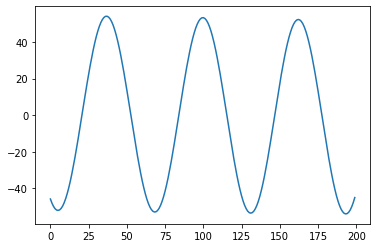

In [55]:
plt.plot(result.x)

In [46]:
grad.reshape((1000, 1)).shape


ValueError: cannot reshape array of size 100 into shape (1000,1)

In [ ]:
grad

In [ ]:
optimizer.simulator.solver.n_ctrl_amps